# Decision Tree

## Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

The water_potability file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

#### Loading required libraries

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score

#### Loading data

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/patkr22/project_dataset/main/water_potability.csv")

#### Checking number of missing values

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Plotting the percentage of missing values

<Figure size 1500x800 with 0 Axes>

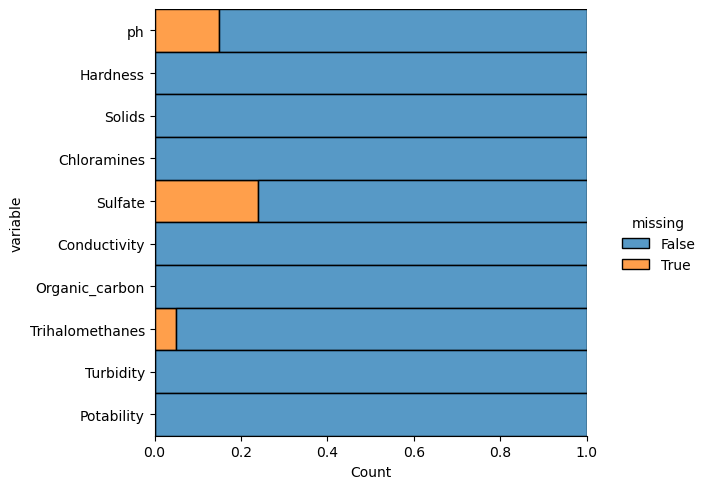

In [ ]:
def Missing_Plot(temp):
  plt.figure(figsize=(15,8))
  sns.displot(
    data = temp.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
  plt.show()


Missing_Plot(df)

#### Clearly there are not many null values so we can replace them with mean values of that particular column (should I instead change to delete instances with the missing values?)

In [ ]:
Null_Columns = ['ph','Sulfate','Trihalomethanes']
df[Null_Columns] = df[Null_Columns].fillna(df[Null_Columns].mean())

#### Checking count of Target column

<AxesSubplot:xlabel='Potability', ylabel='count'>

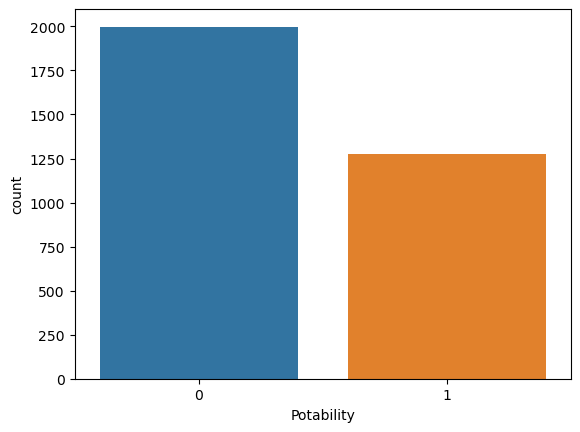

In [ ]:
sns.countplot(x ='Potability', data = df)

#### Countplot suggests an imbalanced data

#### Let's scale the data before passing it through our model

In [ ]:
cols = df.columns.tolist()
Scaler = StandardScaler()
Scaled_Data = pd.DataFrame(Scaler.fit_transform(df[cols[:-1]]), columns = cols[:-1])
Scaled_Data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.027333e-14,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,0.724264,1.240155,-0.118075,0.018481,0.601124
3272,4.953704e-01,-0.085667,-0.534295,0.593290,0.000000,-0.417706,1.698560,0.000000,-1.497627
3273,1.591254e+00,-0.626829,1.270810,0.144017,0.000000,0.072263,-0.981329,0.218748,-0.856007
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,0.000000,-0.288597,-0.942064,0.703468,0.950797


## Decision Tree

#### Building a decision tree with default parameters

In [ ]:
X = Scaled_Data
y = df['Potability']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Fit the classifier with default hyper-parameters
Tree = DecisionTreeClassifier(random_state = 3) 
model = Tree.fit(X_train,y_train)

y_pred = model.predict(X_test)
    
# R2 Score
train_score = float(model.score(X_train, y_train))
print(f'Train Score: {round(train_score*100,2)} %')
    
test_score = float(model.score(X_test, y_test))
print(f'Test Score: {round(test_score*100,2)} %')

Train Score: 100.0 %
Test Score: 56.05 %


#### Since training score is higher than test score, the model is overfitting, let's use Gridsearchcv to tune for best hyperparameters

In [ ]:
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,10,50,100]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 3), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

print('Best Score: ', grid_search_cv.best_score_)

print('Best Parameters: ', grid_search_cv.best_params_)

Fitting 5 folds for each of 1372 candidates, totalling 6860 fits
Best Score:  0.6541655963695522
Best Parameters:  {'criterion': 'entropy', 'max_leaf_nodes': 16, 'min_samples_split': 2}


#### Fitting the classifier with best hyper-parameters

In [ ]:
Tree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 16, min_samples_split = 2) 
model = Tree.fit(X_train,y_train)

y_pred = model.predict(X_test)
    
# R2 Score
train_score = float(model.score(X_train, y_train))
print(f'Train Score: {round(train_score*100,2)} %')
    
test_score = float(model.score(X_test, y_test))
print(f'Test Score: {round(test_score*100,2)} %')

#### We finally have a decent model, with aroung 68% training score, let's get other classification metrices

<AxesSubplot:>

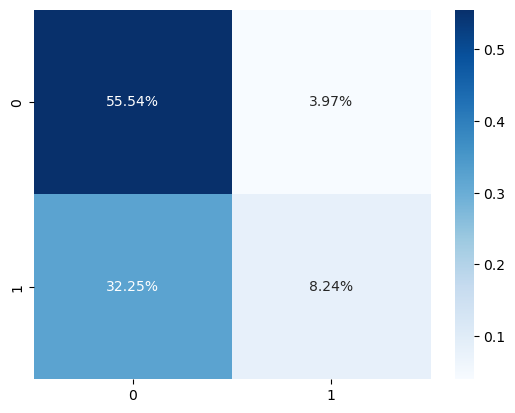

In [ ]:
#Get the confusion matrix
cf_ = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_/np.sum(cf_), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
print('Accuracy Score: ',round(accuracy_score(y_test, y_pred),3))
print('Recall Score: ',round(recall_score(y_test, y_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_pred),3))
print("")
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Accuracy Score:  0.638
Recall Score:  0.204
F1 Score:  0.313

Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.68      0.20      0.31       398

    accuracy                           0.64       983
   macro avg       0.65      0.57      0.53       983
weighted avg       0.65      0.64      0.58       983

